## EDA and Machine Learning in Supermarket Sales Data

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading the data

d=pd.read_csv(r"supermarket_sales.csv")

In [3]:
# Display first 5 rows

d.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Display last 5 rows

d.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
# To show number of columns and rows

d.shape

(1000, 17)

In [6]:
# To show the column names

d.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
# To know about the datatype of each column

d.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
# There are datatypes other than numerical. It needs to be replaced.

In [9]:
# To get the individual values in the non-numerical datatype column.

nn=[ 'Branch', 'City', 'Customer type', 'Gender',
       'Product line','Payment']

for i in nn:
    print('Values in',i,':')
    print(d[i].unique())
    print()

Values in Branch :
['A' 'C' 'B']

Values in City :
['Yangon' 'Naypyitaw' 'Mandalay']

Values in Customer type :
['Member' 'Normal']

Values in Gender :
['Female' 'Male']

Values in Product line :
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']

Values in Payment :
['Ewallet' 'Cash' 'Credit card']



In [10]:
# Replacing the non-numerical datatype values with numerical values using LabelEncoder.

le=LabelEncoder()

nn=[ 'Branch', 'City', 'Customer type', 'Gender',
       'Product line','Payment']

for i in nn:
    d[i]=le.fit_transform(d[i])

In [11]:
# To get the individual values in the non-numerical datatype column.

nn=[ 'Branch', 'City', 'Customer type', 'Gender',
       'Product line','Payment']

for i in nn:
    print('Values in',i,':')
    print(d[i].unique())
    print()

Values in Branch :
[0 2 1]

Values in City :
[2 1 0]

Values in Customer type :
[0 1]

Values in Gender :
[0 1]

Values in Product line :
[3 0 4 5 2 1]

Values in Payment :
[2 0 1]



In [12]:
# Changing the date column 

d['date'] = pd.to_datetime(d['Date'])

d['day'] = d['date'].dt.day
d['month'] = d['date'].dt.month
d['year'] = d['date'].dt.year

# Show data

d.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,...,13:08,2,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,...,10:29,0,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,...,13:23,1,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,...,20:33,2,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,...,10:37,2,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019


In [13]:
# Changing the Time column 

d['time'] = pd.to_datetime(d['Time'])

d['Hour'] = (d['time']).dt.hour

# Show data

d.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,date,day,month,year,time,Hour
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,2023-07-16 13:08:00,13
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,2023-07-16 10:29:00,10
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,2023-07-16 13:23:00,13
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,2023-07-16 20:33:00,20
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,2023-07-16 10:37:00,10


In [14]:
# Checking columns

d.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date', 'day', 'month', 'year', 'time', 'Hour'],
      dtype='object')

In [15]:
# To display basic information

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   int32         
 2   City                     1000 non-null   int32         
 3   Customer type            1000 non-null   int32         
 4   Gender                   1000 non-null   int32         
 5   Product line             1000 non-null   int32         
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [16]:
# To display statistical insights of data

d.describe()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,0.988000,1.008000,0.499000,0.499000,2.452000,55.672130,5.510000,15.379369,322.966749,1.001000,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,0.817633,0.820127,0.500249,0.500249,1.715412,26.494628,2.923431,11.708825,245.885335,0.830475,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,0.000000,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,0.000000,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,1.000000,1.000000,0.000000,0.000000,2.000000,55.230000,5.000000,12.088000,253.848000,1.000000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,2.000000,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.445250,471.350250,2.000000,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,2.000000,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,49.650000,1042.650000,2.000000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [17]:
# Check for duplicated rows in the data.

d.duplicated().sum()

0

In [18]:
# Check for null values

d.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
day                        0
month                      0
year                       0
time                       0
Hour                       0
dtype: int64

In [19]:
# There is no missing values.

Unit price


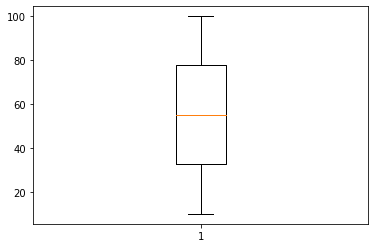

Quantity


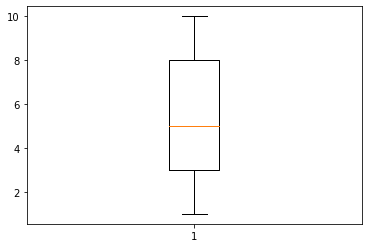

Tax 5%


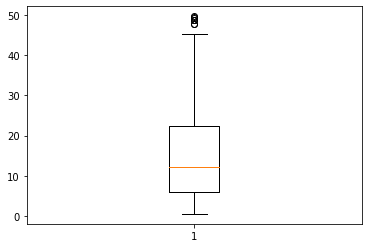

Total


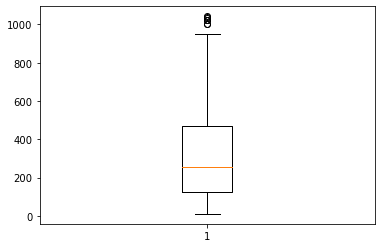

cogs


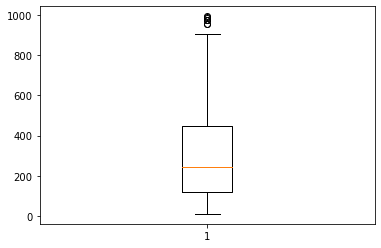

gross margin percentage


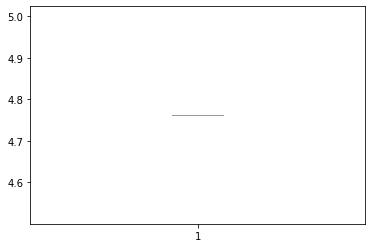

gross income


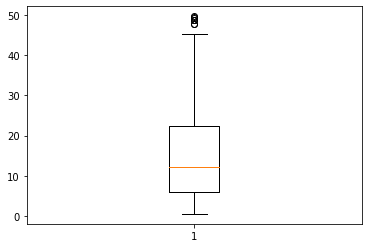

Rating


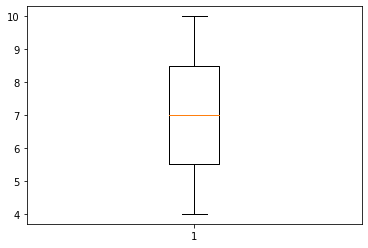

day


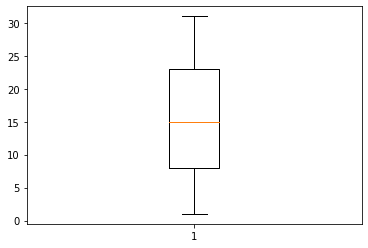

month


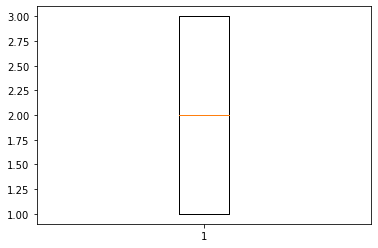

year


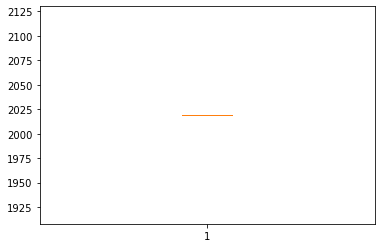

Hour


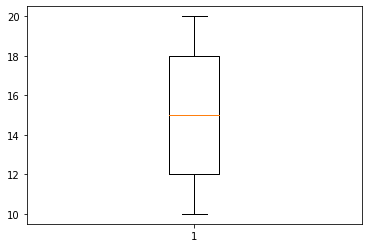

In [20]:
# Finding outliers using boxplot

col=[ 'Unit price', 'Quantity', 'Tax 5%', 'Total', 
      'cogs', 'gross margin percentage', 'gross income',
       'Rating',  'day', 'month', 'year',  'Hour']

for i in col:
    print(i)
    plt.boxplot(d[i])
    plt.show()

In [21]:
# There is not a larger number of outliers

In [22]:
# Removing outliers

colm=['Unit price', 'Quantity', 'Tax 5%', 'Total', 
      'cogs', 'gross margin percentage', 'gross income',
       'Rating',  'day', 'month', 'year',  'Hour']

for i in colm:
    q1=np.percentile(d[i],25,interpolation='midpoint')
    q2=np.percentile(d[i],50,interpolation='midpoint')
    q3=np.percentile(d[i],75,interpolation='midpoint')
    
    iqr=q3-q1
    low=q1-1.5*iqr
    up=q3+1.5*iqr
    
    for j in d[i]:
        if j<low:
            d[i]=d[i].replace(j,low)
        elif j>up:
            d[i]=d[i].replace(j,up)

Unit price


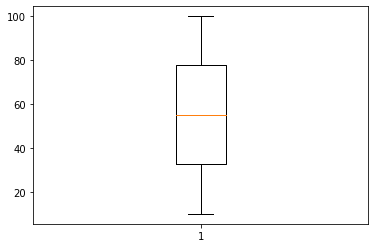

Quantity


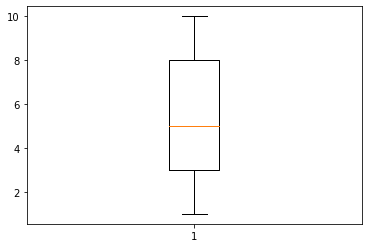

Tax 5%


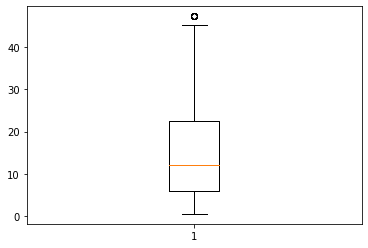

Total


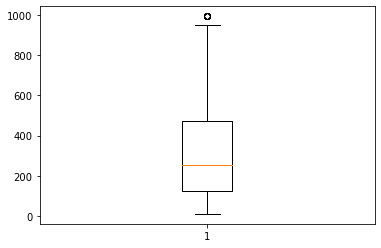

cogs


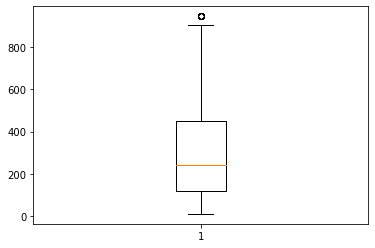

gross margin percentage


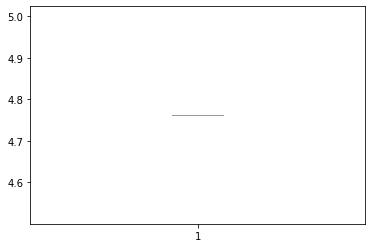

gross income


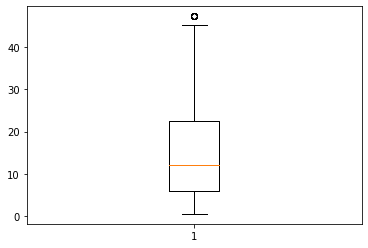

Rating


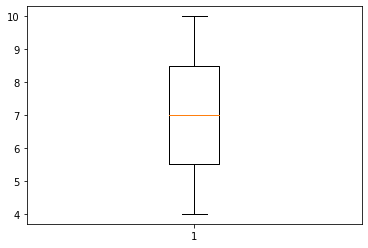

day


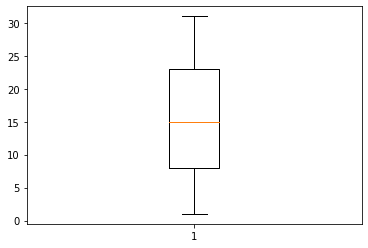

month


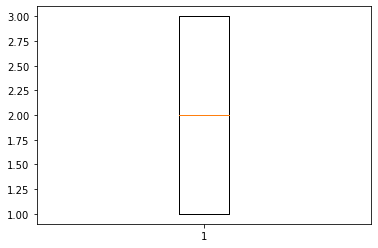

year


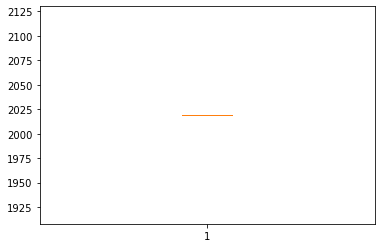

Hour


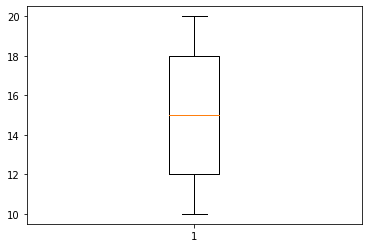

In [23]:
# Checking for outliers using boxplot

for i in col:
    print(i)
    plt.boxplot(d[i])
    plt.show()

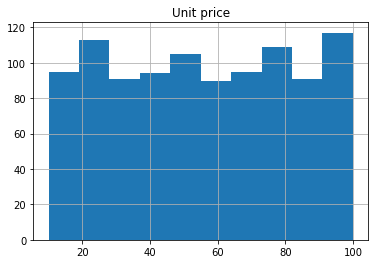

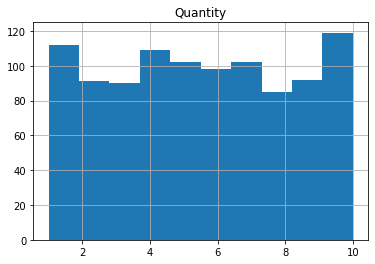

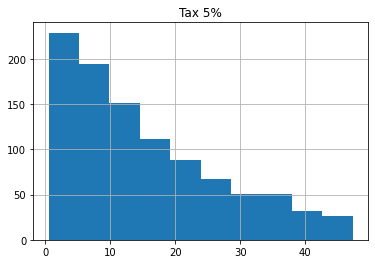

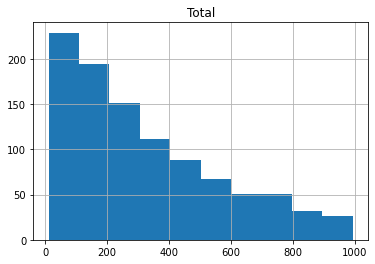

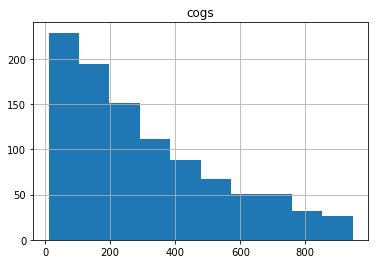

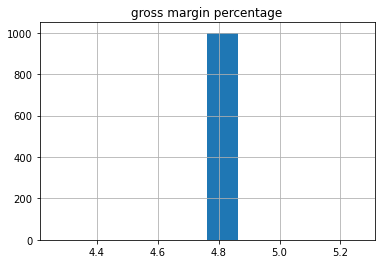

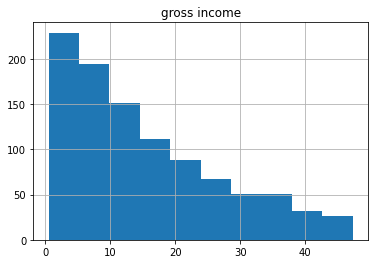

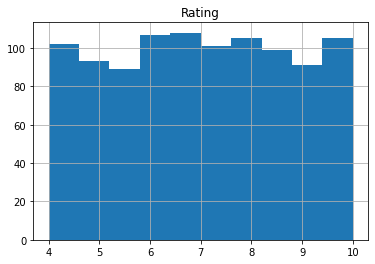

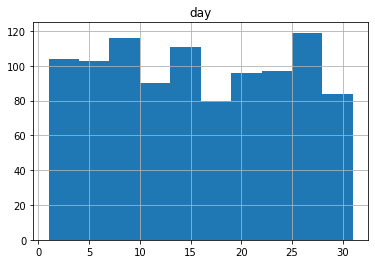

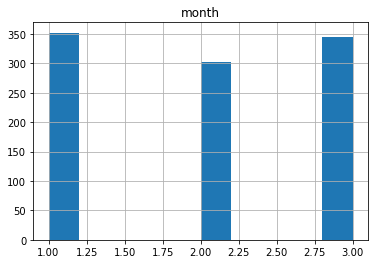

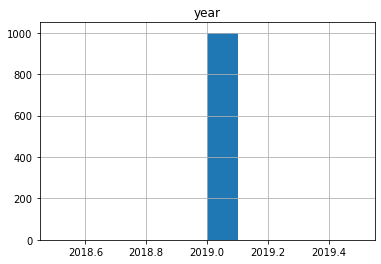

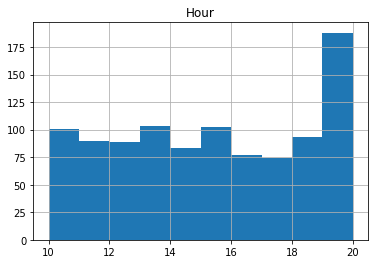

In [24]:
# Plotting histogram

col=['Unit price', 'Quantity', 'Tax 5%', 'Total', 
      'cogs', 'gross margin percentage', 'gross income',
       'Rating',  'day', 'month', 'year',  'Hour']

for i in col:
    d.hist(i)

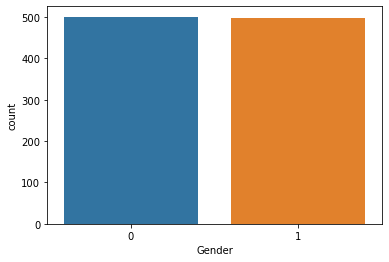

In [25]:
# Plotting the count of gender

sns.countplot(d["Gender"])
plt.show()

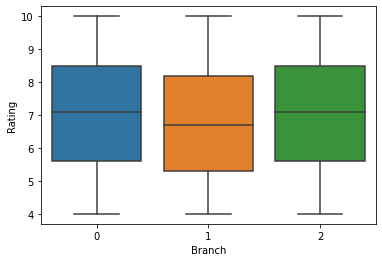

In [26]:
# Plotting boxplot for rating in each branch

sns.boxplot(d["Branch"],d["Rating"])
plt.show()

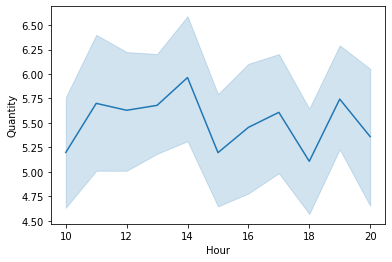

In [27]:
# Plotting lineplot

sns.lineplot(d["Hour"],d['Quantity'])
plt.show()

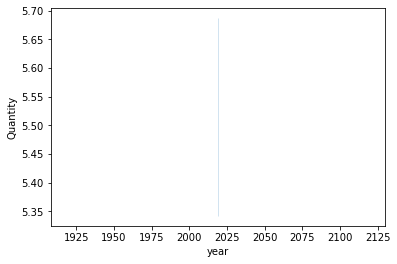

In [28]:
sns.lineplot(d["year"],d['Quantity'])
plt.show()

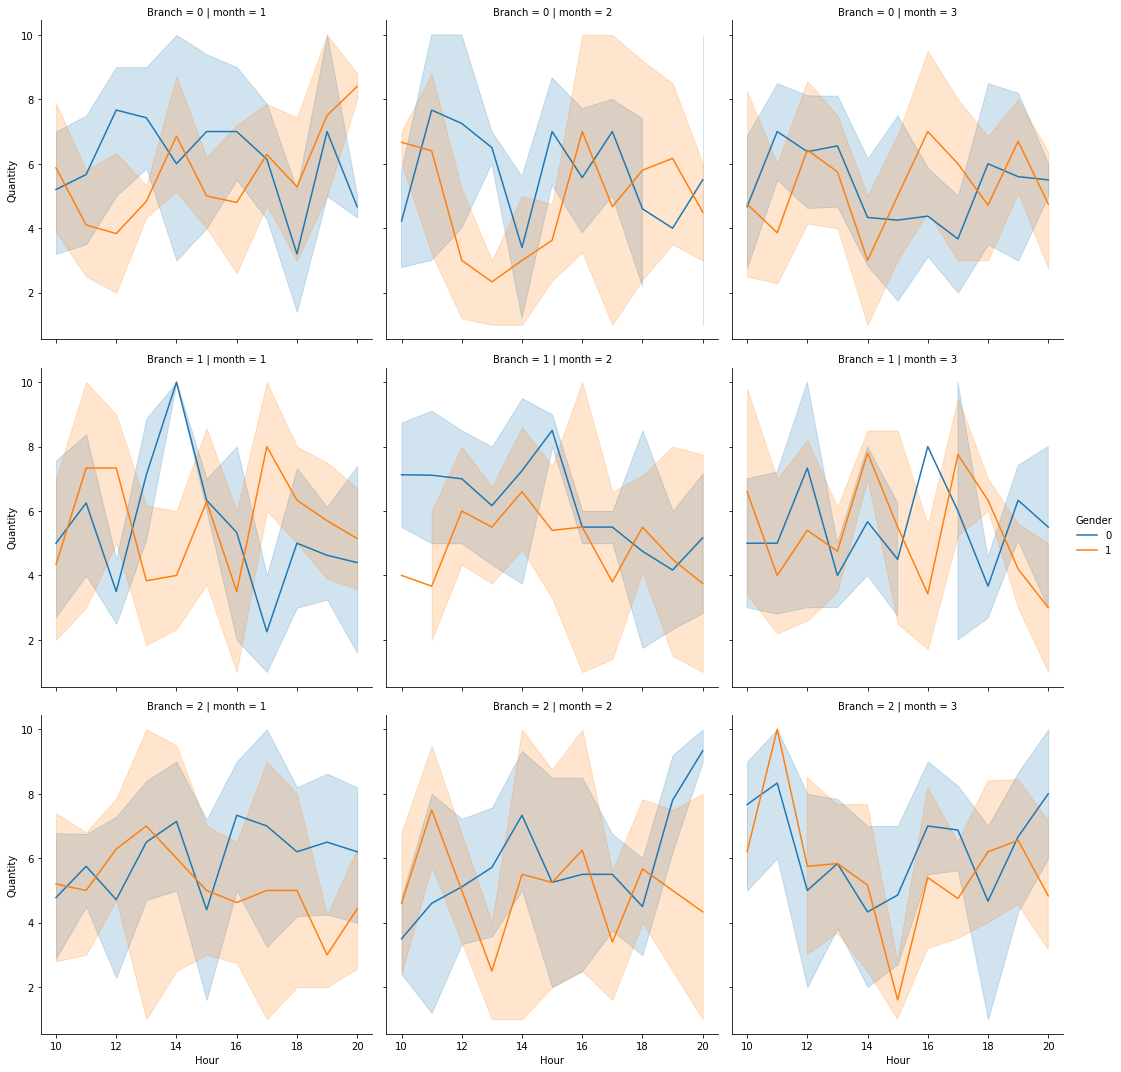

In [29]:
sns.relplot(data=d, x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender")
plt.show()

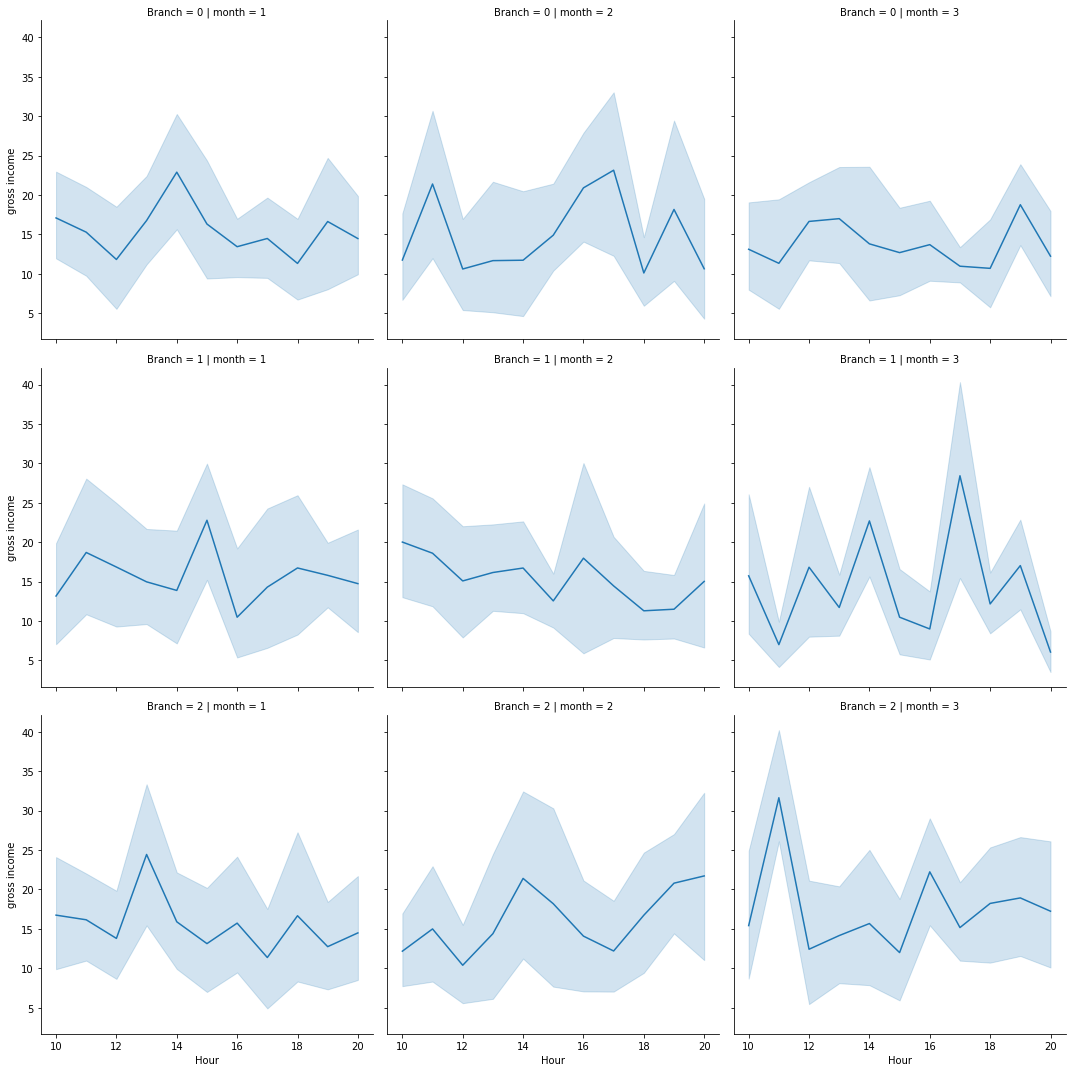

In [30]:
sns.relplot(data=d, x="Hour",  y = 'gross income', col= 'month' , row= 'Branch', kind="line")
plt.show()

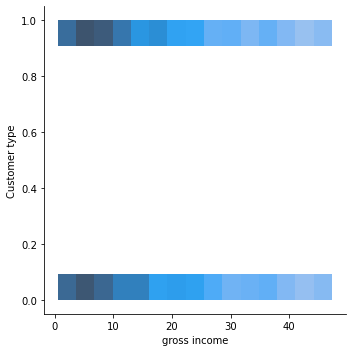

In [31]:
sns.displot(d, x='gross income',y='Customer type',kind='hist')
plt.show()

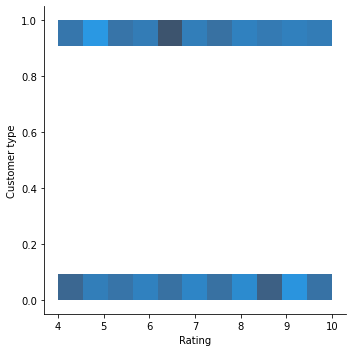

In [32]:
sns.displot(d, x='Rating',y='Customer type',kind='hist')
plt.show()

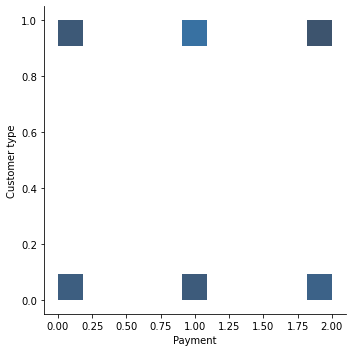

In [33]:
sns.displot(data=d, x='Payment',y='Customer type',kind='hist')
plt.show()

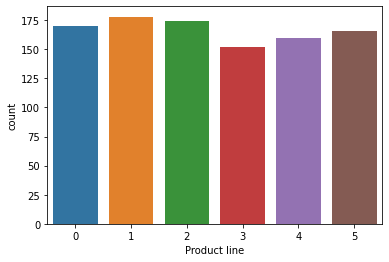

In [34]:
sns.countplot(data=d, x="Product line")
plt.show()

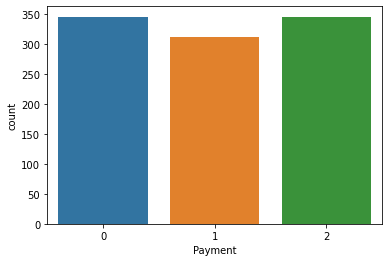

In [35]:
sns.countplot(data=d, x="Payment")
plt.show()

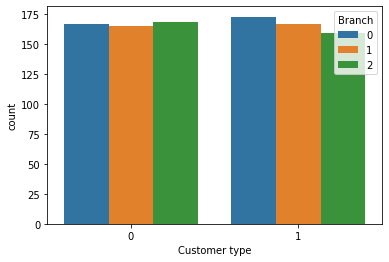

In [36]:
sns.countplot(data=d, x="Customer type", hue = "Branch")
plt.show()

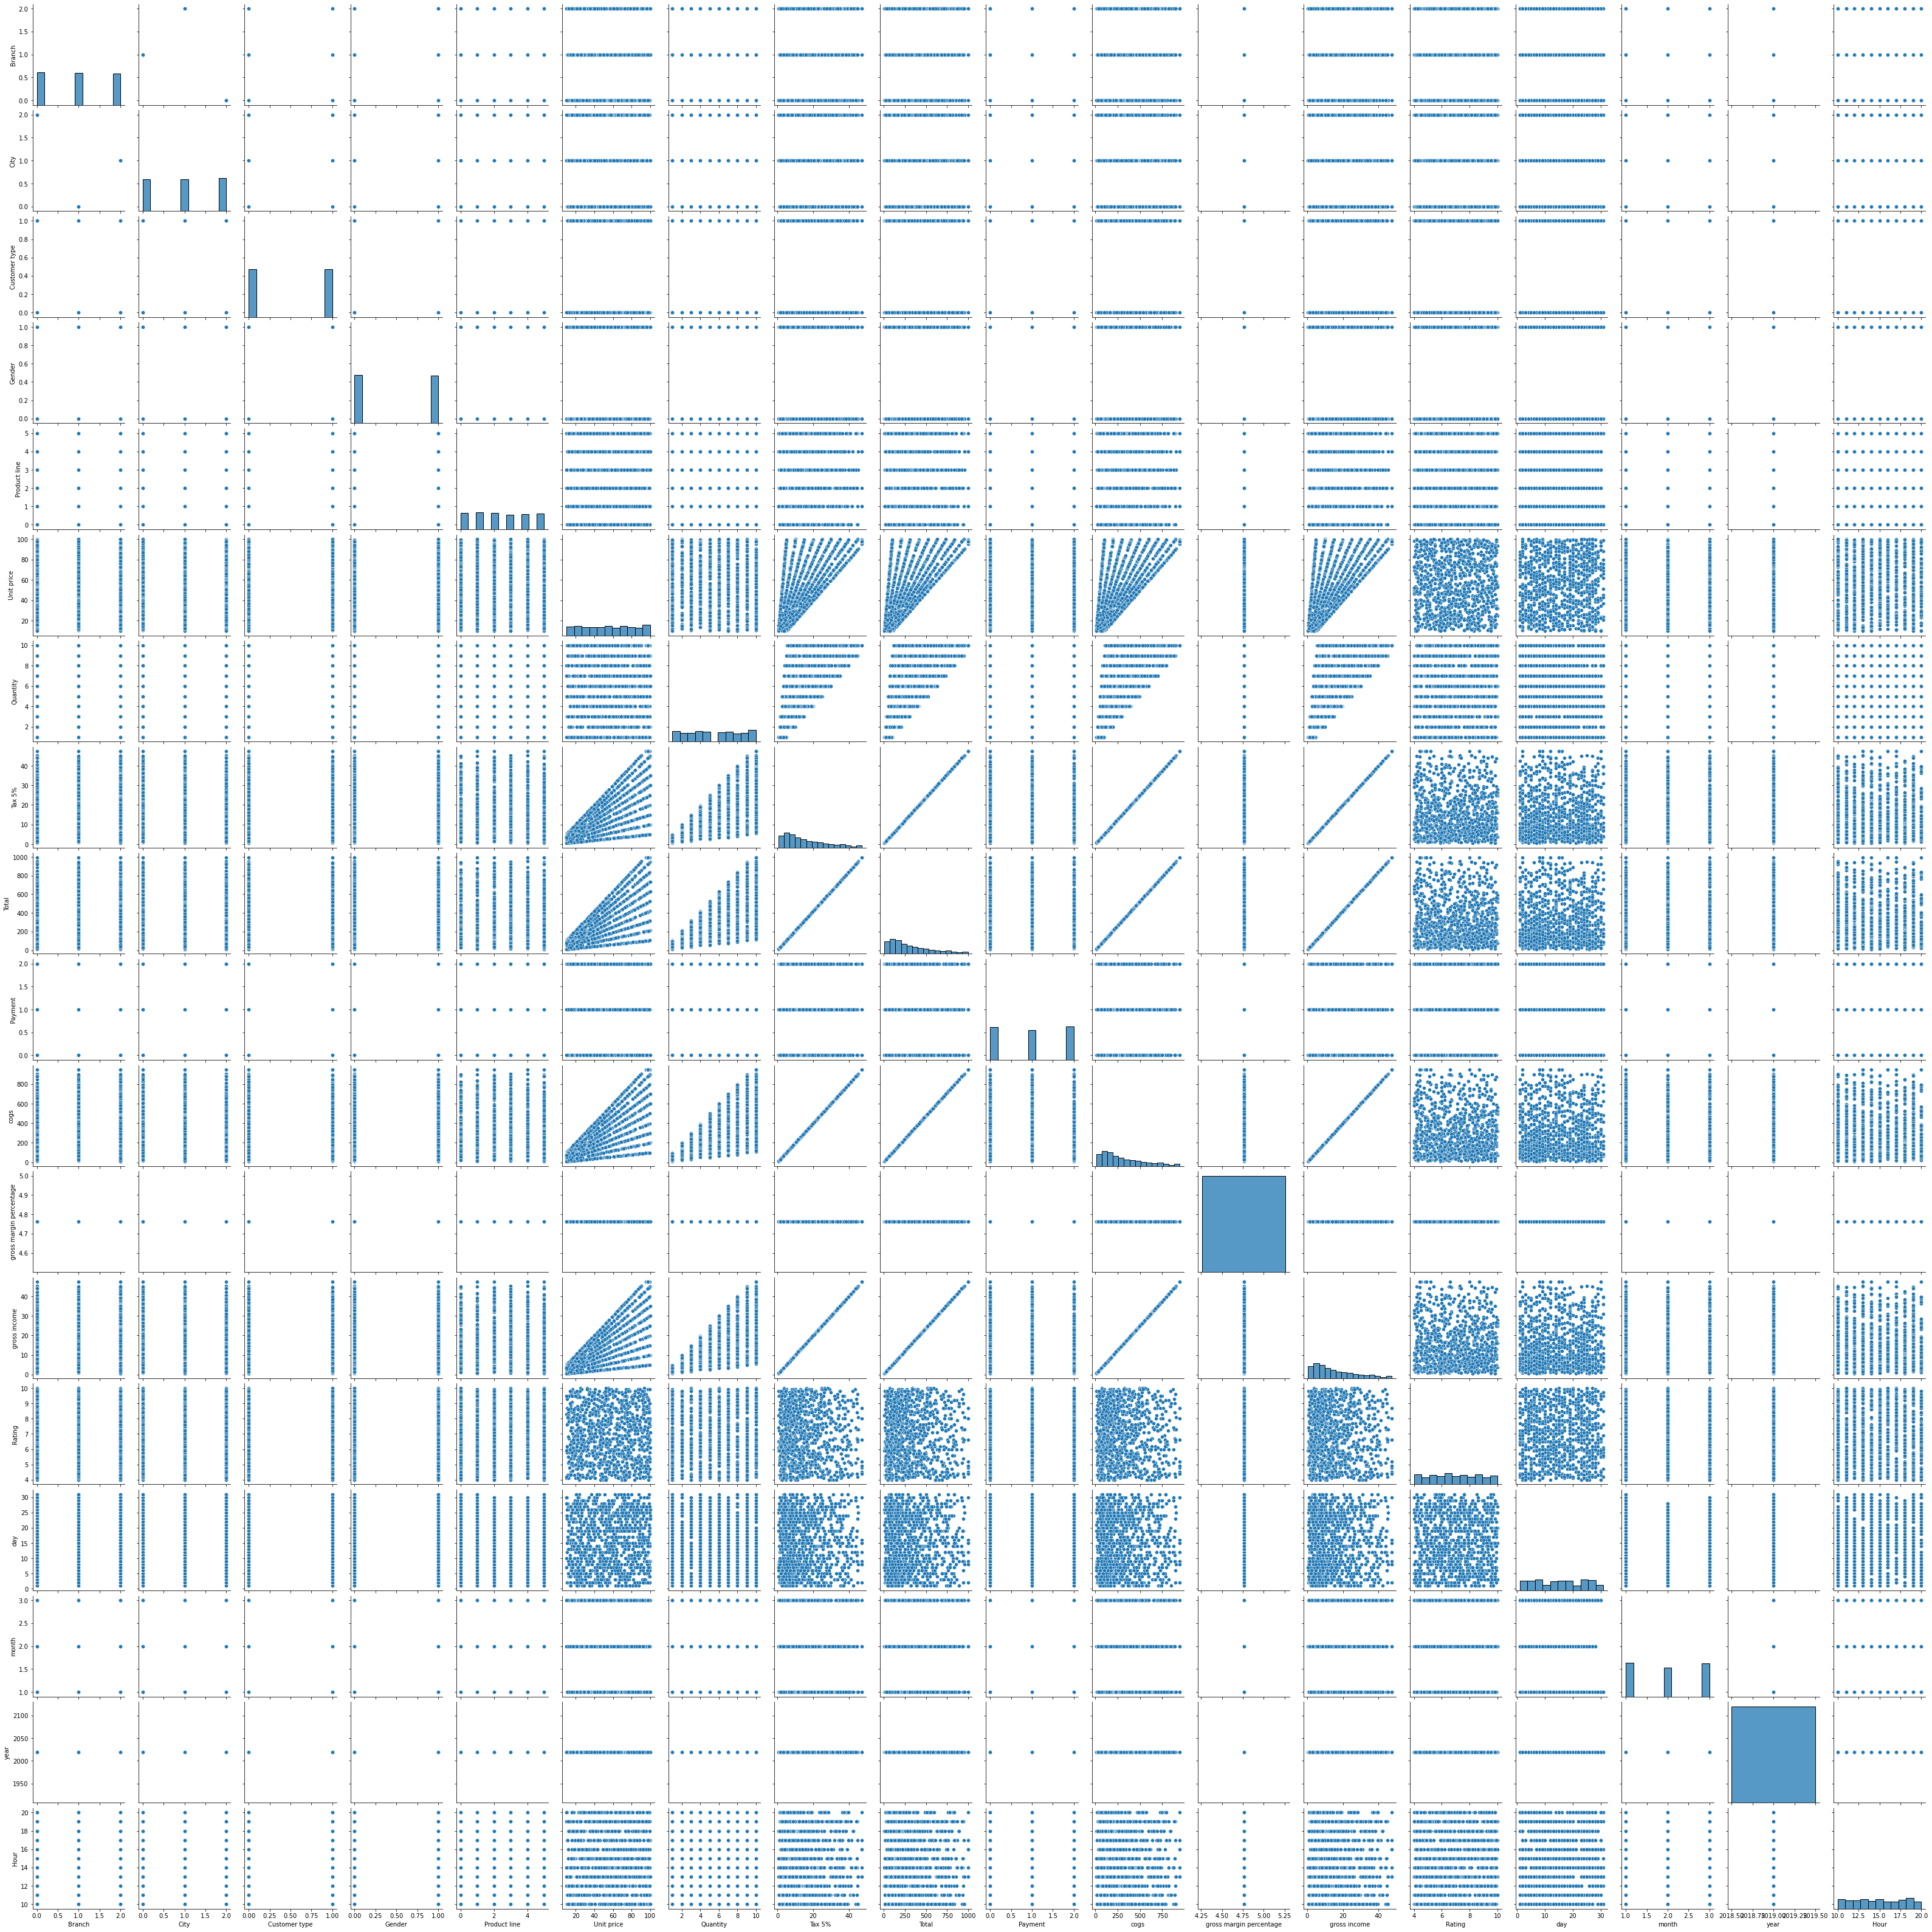

In [37]:
# Creating pairplot

sns.pairplot(d)
plt.show()

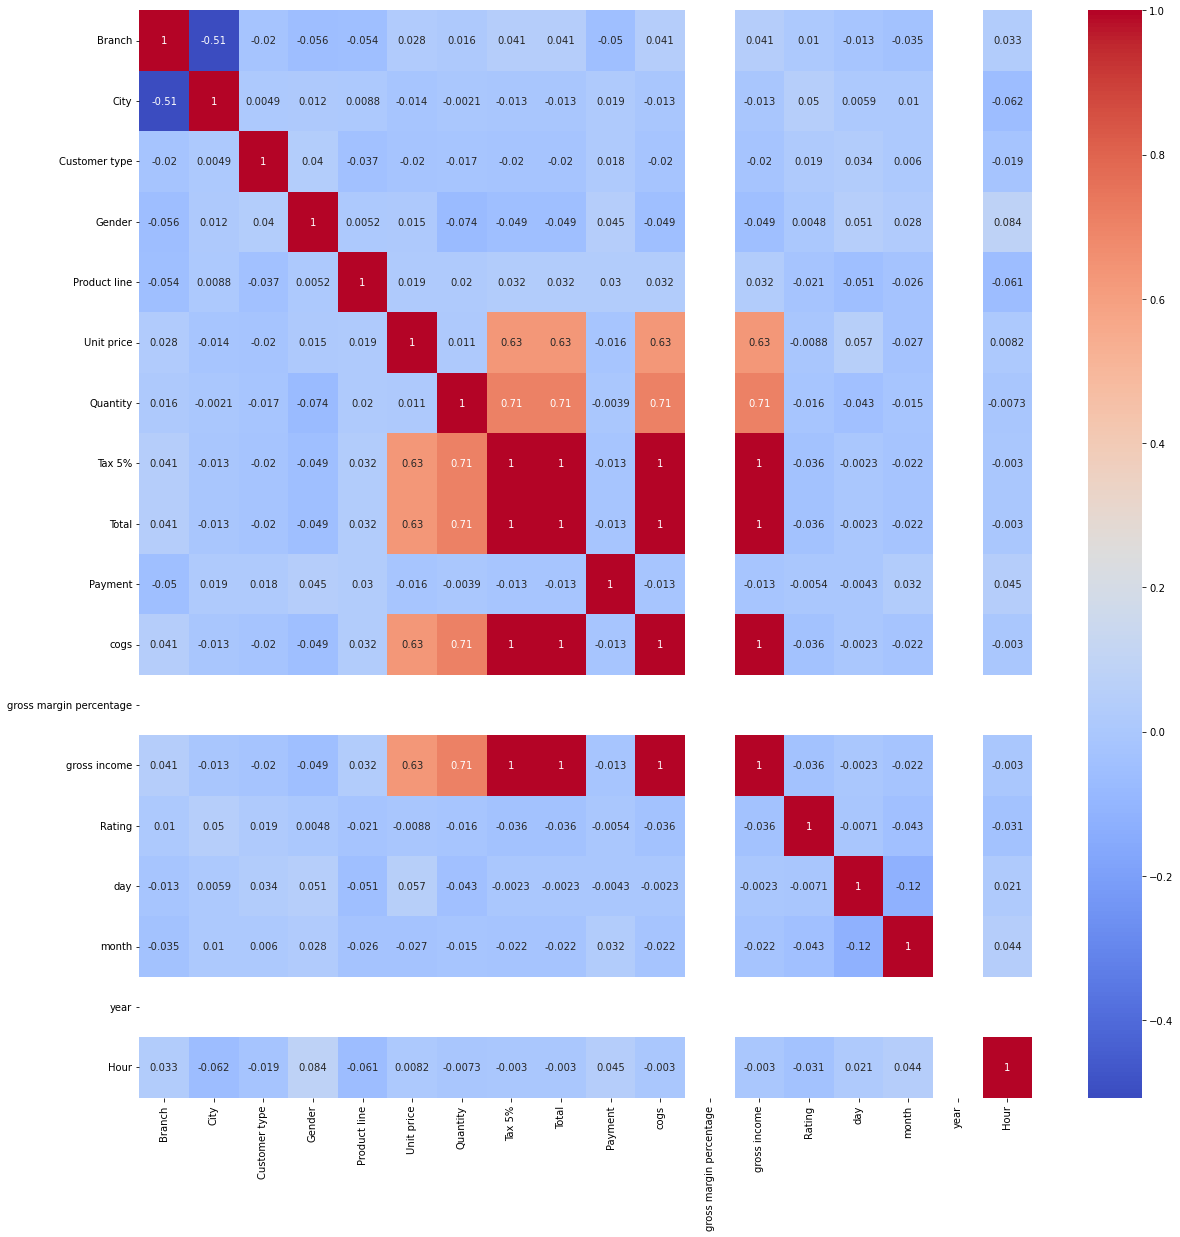

In [38]:
# Creating correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(d.corr(),annot=True,cmap='coolwarm')
plt.show()

In [39]:
# Checking unique value in the column gross margin percentage and year

print(d['gross margin percentage'].value_counts())
print(d['year'].value_counts())

4.761905    1000
Name: gross margin percentage, dtype: int64
2019    1000
Name: year, dtype: int64


In [40]:
# The dataset contains 1000 rows and all rows contain the same value for gross margin percentage and year columns.
# So, these columns does not have any relation with other columns.
# This is the reason that the correlation heatmap is blank in these particular columns.

# Those columns are dropped.

d=d.drop('gross margin percentage',axis=1)
d=d.drop('year',axis=1)

# Checking the data

d.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross income,Rating,date,day,month,time,Hour
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,...,13:08,2,522.83,26.1415,9.1,2019-01-05,5,1,2023-07-16 13:08:00,13
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,...,10:29,0,76.40,3.8200,9.6,2019-03-08,8,3,2023-07-16 10:29:00,10
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,...,13:23,1,324.31,16.2155,7.4,2019-03-03,3,3,2023-07-16 13:23:00,13
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,...,20:33,2,465.76,23.2880,8.4,2019-01-27,27,1,2023-07-16 20:33:00,20
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,...,10:37,2,604.17,30.2085,5.3,2019-02-08,8,2,2023-07-16 10:37:00,10


In [41]:
# Invoice ID, Date and Time are another unnecessary columns. It could also be dropped.

d=d.drop(['Invoice ID','Date','Time','date', 'day', 'month', 'time', 'Hour'],axis=1)

In [42]:
# Machine learning

# Splitting the data into x and y. ie, independant variables and target column.

y=d["gross income"]
x=d.drop(["gross income"],axis=1)

In [43]:
# Traing the model with LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

model=LinearRegression()

model.fit(x_train,y_train)
model_train=model.predict(x_train)
model_test=model.predict(x_test)

print('MSE :',mean_squared_error(y_test, model_test))
print('r2_score of train :',r2_score(y_train,model_train))
print('r2_score of test :',r2_score(y_test, model_test))

MSE : 4.7892033161505986e-29
r2_score of train : 1.0
r2_score of test : 1.0


In [44]:
# Traing the model with RandomForestRegressor

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

model=RandomForestRegressor()

model.fit(x_train,y_train)
model_train=model.predict(x_train)
model_test=model.predict(x_test)

print('MSE :',mean_squared_error(y_test, model_test))
print('r2_score of train :',r2_score(y_train,model_train))
print('r2_score of test :',r2_score(y_test, model_test))

MSE : 0.004244633624718577
r2_score of train : 0.9999936785277146
r2_score of test : 0.999971191033909


In [45]:
# Traing the model with DecisionTreeRegressor

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

model=DecisionTreeRegressor()

model.fit(x_train,y_train)
model_train=model.predict(x_train)
model_test=model.predict(x_test)

print('MSE :',mean_squared_error(y_test, model_test))
print('r2_score of train :',r2_score(y_train,model_train))
print('r2_score of test :',r2_score(y_test, model_test))

MSE : 0.014361241666666687
r2_score of train : 1.0
r2_score of test : 0.9999025280952893


In [46]:
# Traing the model with KNeighborsRegressor

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

model=KNeighborsRegressor()

model.fit(x_train,y_train)
model_train=model.predict(x_train)
model_test=model.predict(x_test)

print('MSE :',mean_squared_error(y_test, model_test))
print('r2_score of train :',r2_score(y_train,model_train))
print('r2_score of test :',r2_score(y_test, model_test))

MSE : 0.01575349326666666
r2_score of train : 0.9999352615041533
r2_score of test : 0.9998930786745194


In [47]:
# Traing the model with SVR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

model=SVR()

model.fit(x_train,y_train)
model_train=model.predict(x_train)
model_test=model.predict(x_test)

print('MSE :',mean_squared_error(y_test, model_test))
print('r2_score of train :',r2_score(y_train,model_train))
print('r2_score of test :',r2_score(y_test, model_test))

MSE : 0.5882787982680656
r2_score of train : 0.9970366041273239
r2_score of test : 0.9960072634178175


All of the machine learning models has high accuracy and less mean square error. So, all the models are good.